6044312923332.336 test


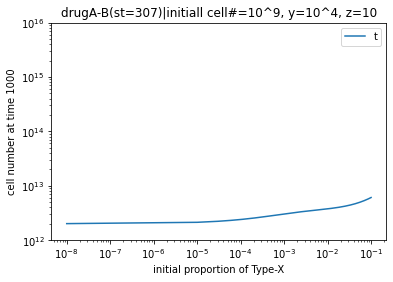

In [1]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

def dyna(x, t, *arg):
    (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qxw*(x[1]/(x[0]+α)))/(pxw+(x[1]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

def dynb(x, t, *arg):
    (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, a, b, c, f, g, h, k, p, q ) = arg
    dw = ((qyw*(x[2]/(x[0]+α)))/(pyw+(x[2]/(x[0]+α))) + ((qzw*(x[3]/(x[0]+α)))/(pzw+(x[3]/(x[0]+α))))+a)*x[0] 
    dx = g*x[0] + (((qzx*(x[3]/(x[1]+α)))/(pzx+(x[3]/(x[1]+α))))+b)*x[1]
    dy = h*x[0] + (((qzy*(x[3]/(x[2]+α)))/(pzy+(x[3]/(x[2]+α))))+c)*x[2]
    dz = k*x[0] + p*x[1] + q*x[2] + f*x[3]
    return np.array([dw, dx, dy, dz])

α = 0.00000001

initial_N = 10**9
# X = 10**7
# Y = 10**7
# Z = 10
# W = initial_N-X-Y-Z

t_end = 1000
tan = 307

list_t = np.arange(0, tan, 0.01) 
list_t1 = np.arange(tan, t_end, 0.01) 

qxw = 0.08
pxw = 0.0009
pyw = 0.08
qyw = 0.0009
qzw = 0.06
pzw = 0.0009
qzx = 0.07
pzx = 0.0009
qzy = 0.007
pzy = 0.0009

aA = -0.17
bA = 0.008
cA = -0.137

aB = -0.321
bB = -0.187
cB = 0.0203

f = 0.022
g = 0.0000001
h = 0.0000001 
k = 0.0000001 
p = 0.0000001 
q = 0.0000001
paramsA = (qxw, pxw, qzw, pzw, qzx, pzx, qzy, pzy, aA, bA, cA, f, g, h, k, p, q )
paramsB = (qyw, pyw, qzw, pzw, qzx, pzx, qzy, pzy, aB, bB, cB, f, g, h, k, p, q )

fig = plt.figure()
ax = fig.add_subplot(111)
finalnumber = list()
xprop = list()
for x in np.arange(10, 100000000, 10000):
    xprop.append(x/initial_N)
    list_t = np.arange(0, tan, 0.01)
    list_t1 = np.arange(tan, t_end, 0.01)
    cell_init = [initial_N - x - 10**4 - 10, x, 10**4, 10]
    cells = odeint(dyna, cell_init, list_t, args = paramsA)
    i = len(list_t)-1
    cell1_init = [cells[i, 0], cells[i, 1], cells[i, 2], cells[i, 3]]
    cell1 = odeint(dynb, cell1_init, list_t1, args = paramsB)
    celltotal1 = cell1[:, 0] + cell1[:, 1] + cell1[:, 2] + cell1[:, 3]
    finalnumber.append(celltotal1[-1])
ax.plot(xprop, finalnumber)
lastone = finalnumber[-1]

ax.legend('total cell number')

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_ylim(10**12, 10**16)
ax.set_xlabel('initial proportion of Type-X')
ax.set_ylabel('cell number at time 1000') 
ax.set_title('drugA-B(st=307)|initiall cell#=10^9, y=10^4, z=10')

print (lastone, 'test')
plt.show()